In [3]:
import time

from collections import Counter
from IPython.display import display
from datetime import datetime, timedelta

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# Loading Data and Summany of Table

In [9]:
# Loading Data and Summany

# Loading Data
job_data_df = pd.read_csv('job_postings_training_set.csv')

# Show Summany and 5 rows
display(job_data_df.info(verbose=True))
display(job_data_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17828 entries, 0 to 17827
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17828 non-null  int64 
 1   title                17828 non-null  object
 2   location             17483 non-null  object
 3   department           6314 non-null   object
 4   salary_range         2862 non-null   object
 5   company_profile      14538 non-null  object
 6   description          17827 non-null  object
 7   requirements         15140 non-null  object
 8   benefits             10644 non-null  object
 9   telecommuting        17828 non-null  int64 
 10  has_company_logo     17828 non-null  int64 
 11  has_questions        17828 non-null  int64 
 12  employment_type      14370 non-null  object
 13  required_experience  10804 non-null  object
 14  required_education   9755 non-null   object
 15  industry             12944 non-null  object
 16  func

None

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


<h1 style="color:red;">觀察:</h1><br>
除去目標欄位fraudulent與job_id外，有3個可辨識為數值的欄位: telecommuting、has_company_logo、has_questions<br>
且3個欄位的資料都是沒有缺失的，而剩下的object type可能很難做觀察。<br>
non-null count較少的幾個欄位: department、salary_range、required_education、required_experience<br>

# Observation of "fraudulent"

,0,1
Counts,16966,862
Percentage,95.16%,4.84%


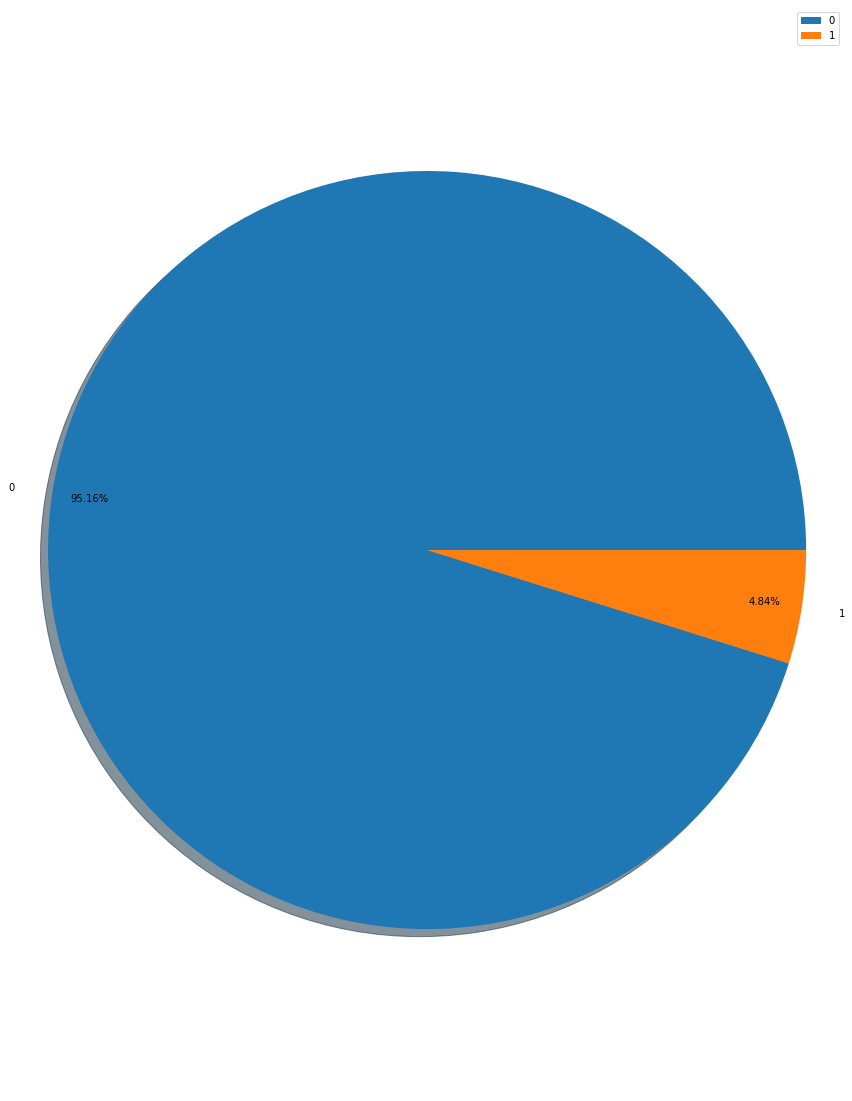

In [20]:
# Rate of Label Data "fraudulent"
labels = []
label_counts = []

for count_label, counts in Counter(job_data_df["fraudulent"]).items():
    labels.append(count_label)
    label_counts.append(counts)

# Show Summany
display(pd.DataFrame([['{:0.0f}'.format(count) for count in label_counts],
                      ['{:0.2f}%'.format(100*count/sum(label_counts)) for count in label_counts]],
                     columns=labels, index=['Counts', 'Percentage']))
# Creat Pie Chart
plt.figure(figsize=(15,20))
plt.pie(label_counts, labels=labels, autopct="%1.2f%%", 
        pctdistance=0.9, textprops={"fontsize" : 10}, shadow=True)
plt.axis('equal')
plt.legend(loc="best") 
plt.show()

<h1 style="color:red;">觀察:</h1><br>
資料不平衡度高，會影響訓練模型，要尋求解決方法<br>

# Observation of "telecommuting"

In [22]:
# Rate of Data "telecommuting"
labels = []
label_counts = []

for count_label, counts in Counter(job_data_df["telecommuting"]).items():
    labels.append(count_label)
    label_counts.append(counts)

# Show Summany
display(pd.DataFrame([['{:0.0f}'.format(count) for count in label_counts],
                      ['{:0.2f}%'.format(100*count/sum(label_counts)) for count in label_counts]],
                     columns=labels, index=['Counts', 'Percentage']))

,0,1
Counts,17062,766
Percentage,95.70%,4.30%


<h1 style="color:red;">觀察:</h1><br>
遠距辦公的比例跟目標欄位很像，有沒有關聯呢?<br>

# Relationship between "telecommuting" and "fraudulent"

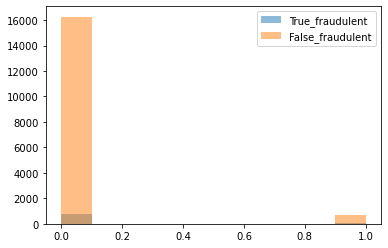

In [29]:
# data filter for fraudulent

T_fraudulent = job_data_df.loc[job_data_df['fraudulent']==1]
F_fraudulent = job_data_df.loc[job_data_df['fraudulent']==0]

plt.hist(T_fraudulent['telecommuting'], alpha=0.5, label='True_fraudulent')
plt.hist(F_fraudulent['telecommuting'], alpha=0.5, label='False_fraudulent')
plt.legend(loc='upper right')
plt.show()

<h1 style="color:red;">觀察:</h1><br>
透過直方圖統計，兩方覆蓋度不太明顯，如果有關連，會是1的方向變深色<br>

In [ ]:
# Show Telecommuting Summany of T_fraudulent and F_fraudulent
display(pd.DataFrame([['{:0.0f}'.format(count) for count in label_counts],
                      ['{:0.2f}%'.format(100*count/sum(label_counts)) for count in label_counts]],
                     columns=labels, index=['Counts', 'Percentage']))